In [ ]:
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [1]:
import keras
import os
import numpy as np
from tqdm import tqdm
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [23]:
target_height = 64
target_width  = 64
target_channel = 3

In [24]:
data_version_number = '0_1'

In [25]:
TRAIN_PATH = 'C:/Users/KaiPin Liao/Documents/kaggle_whales/data/train_' + data_version_number + '/'
VALIDATION_PATH = 'C:/Users/KaiPin Liao/Documents/kaggle_whales/data/validation_' + data_version_number + '/'
TEST_PATH  = 'C:/Users/KaiPin Liao/Documents/kaggle_whales/data/test_' + data_version_number + '/'

In [26]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(target_height, target_width, target_channel)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [27]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

history = keras.callbacks.History()

In [28]:
train_generator = train_datagen.flow_from_directory(TRAIN_PATH, 
                                                    target_size = (target_height, target_width)
#                                                     color_mode = 'grayscale'
                                                   )

validation_generator = test_datagen.flow_from_directory(VALIDATION_PATH, 
                                                    target_size = (target_height, target_width)
#                                                     color_mode = 'grayscale'
                                                   )

Found 342 images belonging to 10 classes.
Found 114 images belonging to 10 classes.


In [29]:
history = model.fit_generator(train_generator, 
                              validation_data = validation_generator,
                              epochs = 50,
                              callbacks=[history]
                             )

Epoch 1/50
11/11 [==============================] - ETA: 12s - loss: 5.8253 - acc: 0.06 - ETA: 6s - loss: 7.0365 - acc: 0.0938 - ETA: 4s - loss: 7.1755 - acc: 0.108 - ETA: 4s - loss: 6.9372 - acc: 0.104 - ETA: 3s - loss: 7.0201 - acc: 0.108 - ETA: 3s - loss: 6.8287 - acc: 0.126 - ETA: 2s - loss: 6.6780 - acc: 0.117 - ETA: 1s - loss: 6.7003 - acc: 0.126 - ETA: 1s - loss: 6.4455 - acc: 0.126 - ETA: 0s - loss: 6.3590 - acc: 0.132 - 9s 792ms/step - loss: 6.1588 - acc: 0.1289 - val_loss: 6.8285 - val_acc: 0.0789
Epoch 2/50
11/11 [==============================] - ETA: 2s - loss: 5.5724 - acc: 0.093 - ETA: 2s - loss: 4.2332 - acc: 0.140 - ETA: 2s - loss: 4.9508 - acc: 0.125 - ETA: 1s - loss: 4.7758 - acc: 0.132 - ETA: 1s - loss: 4.7258 - acc: 0.118 - ETA: 1s - loss: 4.5186 - acc: 0.144 - ETA: 1s - loss: 4.5425 - acc: 0.137 - ETA: 1s - loss: 4.5170 - acc: 0.123 - ETA: 0s - loss: 4.5122 - acc: 0.124 - ETA: 0s - loss: 4.5567 - acc: 0.117 - 7s 648ms/step - loss: 4.4698 - acc: 0.1182 - val_loss: 

Epoch 17/50
11/11 [==============================] - ETA: 2s - loss: 1.9874 - acc: 0.468 - ETA: 2s - loss: 1.9080 - acc: 0.468 - ETA: 2s - loss: 1.9611 - acc: 0.406 - ETA: 1s - loss: 1.9197 - acc: 0.382 - ETA: 1s - loss: 1.9285 - acc: 0.368 - ETA: 1s - loss: 1.9246 - acc: 0.364 - ETA: 1s - loss: 1.9389 - acc: 0.366 - ETA: 1s - loss: 1.9202 - acc: 0.371 - ETA: 0s - loss: 1.8997 - acc: 0.392 - ETA: 0s - loss: 1.9008 - acc: 0.380 - 9s 786ms/step - loss: 1.8981 - acc: 0.3631 - val_loss: 1.8616 - val_acc: 0.4123
Epoch 18/50
11/11 [==============================] - ETA: 2s - loss: 1.7059 - acc: 0.250 - ETA: 2s - loss: 1.6844 - acc: 0.296 - ETA: 2s - loss: 1.7730 - acc: 0.343 - ETA: 2s - loss: 1.7885 - acc: 0.351 - ETA: 1s - loss: 1.8016 - acc: 0.326 - ETA: 1s - loss: 1.8365 - acc: 0.334 - ETA: 1s - loss: 1.8424 - acc: 0.345 - ETA: 1s - loss: 1.8362 - acc: 0.348 - ETA: 1s - loss: 1.8312 - acc: 0.358 - ETA: 0s - loss: 1.8250 - acc: 0.372 - 10s 879ms/step - loss: 1.8292 - acc: 0.3676 - val_loss

Epoch 33/50
11/11 [==============================] - ETA: 2s - loss: 0.7837 - acc: 0.843 - ETA: 2s - loss: 0.8109 - acc: 0.812 - ETA: 1s - loss: 0.8907 - acc: 0.770 - ETA: 1s - loss: 0.8566 - acc: 0.781 - ETA: 1s - loss: 0.8187 - acc: 0.768 - ETA: 1s - loss: 0.7999 - acc: 0.784 - ETA: 1s - loss: 0.7684 - acc: 0.793 - ETA: 1s - loss: 0.7573 - acc: 0.787 - ETA: 0s - loss: 0.7448 - acc: 0.786 - ETA: 0s - loss: 0.7668 - acc: 0.786 - 6s 585ms/step - loss: 0.7433 - acc: 0.7886 - val_loss: 1.7580 - val_acc: 0.5877
Epoch 34/50
11/11 [==============================] - ETA: 2s - loss: 0.5848 - acc: 0.781 - ETA: 1s - loss: 0.5442 - acc: 0.812 - ETA: 1s - loss: 0.5880 - acc: 0.802 - ETA: 1s - loss: 0.7511 - acc: 0.781 - ETA: 1s - loss: 0.7664 - acc: 0.768 - ETA: 1s - loss: 0.7236 - acc: 0.786 - ETA: 1s - loss: 0.7192 - acc: 0.790 - ETA: 1s - loss: 0.7680 - acc: 0.781 - ETA: 0s - loss: 0.7620 - acc: 0.781 - ETA: 0s - loss: 0.7820 - acc: 0.775 - 6s 577ms/step - loss: 0.7688 - acc: 0.7708 - val_loss:

Epoch 49/50
11/11 [==============================] - ETA: 2s - loss: 0.4255 - acc: 0.875 - ETA: 2s - loss: 0.4502 - acc: 0.859 - ETA: 1s - loss: 0.4290 - acc: 0.822 - ETA: 1s - loss: 0.3779 - acc: 0.843 - ETA: 1s - loss: 0.3947 - acc: 0.856 - ETA: 1s - loss: 0.3721 - acc: 0.854 - ETA: 1s - loss: 0.3527 - acc: 0.853 - ETA: 0s - loss: 0.3640 - acc: 0.855 - ETA: 0s - loss: 0.3572 - acc: 0.868 - ETA: 0s - loss: 0.3385 - acc: 0.875 - 6s 513ms/step - loss: 0.3252 - acc: 0.8809 - val_loss: 1.8519 - val_acc: 0.6316
Epoch 50/50
11/11 [==============================] - ETA: 2s - loss: 0.2781 - acc: 0.875 - ETA: 2s - loss: 0.3048 - acc: 0.875 - ETA: 1s - loss: 0.2778 - acc: 0.875 - ETA: 1s - loss: 0.3115 - acc: 0.851 - ETA: 1s - loss: 0.3081 - acc: 0.868 - ETA: 1s - loss: 0.3098 - acc: 0.875 - ETA: 1s - loss: 0.3095 - acc: 0.870 - ETA: 0s - loss: 0.2902 - acc: 0.882 - ETA: 0s - loss: 0.2756 - acc: 0.892 - ETA: 0s - loss: 0.2667 - acc: 0.896 - 6s 508ms/step - loss: 0.2623 - acc: 0.8899 - val_loss:

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


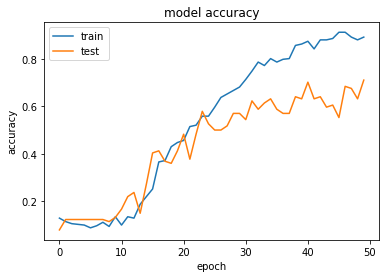

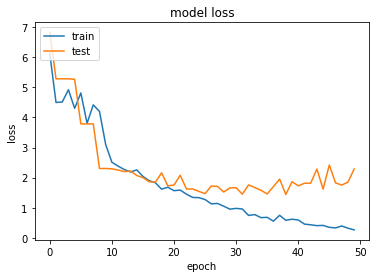

In [30]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.legend(['train'], loc='upper left')
plt.show()

In [31]:
history.history['loss']

[6.124140365779051,
 4.496220129972313,
 4.510300856584694,
 4.91869022135149,
 4.3011205293978865,
 4.81219856641446,
 3.8057886926751388,
 4.41726331264652,
 4.199552078693234,
 3.098654459791574,
 2.509614510842931,
 2.3820483489343296,
 2.268481184864602,
 2.188745707796331,
 2.2572999035405834,
 2.0392471098760416,
 1.8977407286738792,
 1.8285077886971814,
 1.6169014067677727,
 1.680379715579295,
 1.566061208122655,
 1.5872413826267622,
 1.4501062150587116,
 1.343688794743945,
 1.3347210333361264,
 1.2725507578654596,
 1.1294228451990942,
 1.1433884762881095,
 1.05028924537681,
 0.9529147468812285,
 0.9787506788794758,
 0.9586487869073076,
 0.7443014404229951,
 0.7724117246287608,
 0.6714553364187653,
 0.6813606804574442,
 0.5536935183039883,
 0.7485506255724277,
 0.5813547989778352,
 0.619128732304824,
 0.5932528008843025,
 0.4568427658220481,
 0.433827989631229,
 0.40537433038678083,
 0.41350192633288646,
 0.3500421760026474,
 0.3292547422542907,
 0.3940840908135587,
 0.32156579